# Africa Credit Challenge

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Dataset

In [3]:
# Loading the train dataset
df = pd.read_csv('Train.csv')
df_final_test = pd.read_csv('Test.csv')
df_economic_indicators = pd.read_csv('economic_indicators.csv')

#### Basic information of Dataset

In [5]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [6]:
print(df_final_test.info())
print("\nMissing values:\n", df_final_test.isnull().sum())
display(df_final_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18594 non-null  object 
 1   customer_id                  18594 non-null  int64  
 2   country_id                   18594 non-null  object 
 3   tbl_loan_id                  18594 non-null  int64  
 4   lender_id                    18594 non-null  int64  
 5   loan_type                    18594 non-null  object 
 6   Total_Amount                 18594 non-null  float64
 7   Total_Amount_to_Repay        18594 non-null  float64
 8   disbursement_date            18594 non-null  object 
 9   due_date                     18594 non-null  object 
 10  duration                     18594 non-null  int64  
 11  New_versus_Repeat            18594 non-null  object 
 12  Amount_Funded_By_Lender      18594 non-null  float64
 13  Lender_portion_F

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594.000000,18594.000000,18594.000000,1.859400e+04,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,262489.507207,282416.633538,271876.749274,1.446507e+04,1.578416e+04,13.530763,2278.430133,0.207090,2466.451967
std,28957.312848,52907.548852,12349.646095,1.569085e+05,1.871893e+05,36.437325,6784.429774,0.122085,7680.081817
min,6083.000000,104034.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250357.000000,240880.500000,267278.000000,2.101900e+03,2.164480e+03,7.000000,239.360000,0.131313,244.035000
50%,259107.000000,273442.500000,267278.000000,4.740000e+03,4.828000e+03,7.000000,744.575000,0.300000,758.920000
75%,270051.250000,304856.000000,267278.000000,1.026775e+04,1.056757e+04,7.000000,1998.000000,0.300000,2041.000000
max,312696.000000,375320.000000,297183.000000,2.000000e+07,2.415284e+07,849.000000,400000.000000,1.000000,423400.000000


In [7]:
display("Economic Indicators Dataset",df_economic_indicators.head(),df_economic_indicators.shape)

'Economic Indicators Dataset'

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


(27, 25)

In [8]:
display(df_economic_indicators.head().T)

,0,1,2,3,4
Country,Ghana,Cote d'Ivoire,Kenya,Ghana,Cote d'Ivoire
Indicator,"Inflation, consumer prices (annual %)","Inflation, consumer prices (annual %)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period av...","Official exchange rate (LCU per US$, period av..."
YR2001,41.509496,4.361529,5.738598,0.716305,732.397693
YR2002,9.360932,3.077265,1.961308,0.792417,693.713226
YR2003,29.77298,3.296807,9.815691,0.866764,579.897426
YR2004,18.042739,1.457988,11.624036,0.899495,527.338032
YR2005,15.438992,3.88583,10.312778,0.905209,527.258363
YR2006,11.679184,2.467191,14.453734,0.915107,522.425625
YR2007,10.734267,1.892006,9.75888,0.932619,478.633718
YR2008,16.49464,6.308528,26.239817,1.052275,446.000041


In [15]:
# Check column types & missing values
df.isna().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

In [17]:
# Investigate numerical data
df.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [19]:
# Data Quality Checks
print("\n Duplicate rows:", df.duplicated().sum())


 Duplicate rows: 0


### Data Cleaning

In [56]:
def clean_dataset(df):
    # Create a cop of dataframe
    df = df.copy()

    # Format column names to lowercase
    df.columns = df.columns.str.lower()

    # Convert dates
    try:
        df['due_date'] = pd.to_datetime(df['due_date'])
        df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
    except KeyError as e:
        print(f"Warning: Date column not found - {e}")
    except ValueError as e:
        print(f"Warning: Date conversion error - {e}")
        
    # Get categorical columns
    categorical = list(df.dtypes[df.dtypes == 'object'].index)
    print("Categorical columns:", categorical)
    
    # Format strings in categorical columns
    for col in categorical:
            df[col] = df[col].str.lower().str.replace(' ', '_')
    
    # Drop customer_id
    if 'customer_id' in df.columns:
        df = df.drop('customer_id', axis=1)
        
    if 'tbl_loan_id' in df.columns:
        df = df.drop('tbl_loan_id', axis=1)

    # convert lender_id to object
    df.lender_id = df.lender_id.astype('str')
    
    return df

In [60]:
# Dataset Cleaning
df = clean_dataset(df)
display(df.head(5))
print()
print(df.info())

Categorical columns: ['id', 'country_id', 'lender_id', 'loan_type', 'new_versus_repeat']


,id,country_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target
0,id_266671248032267278,kenya,267278,type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,repeat_loan,120.85,0.014305,121.0,0
1,id_248919228515267278,kenya,267278,type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,repeat_loan,7768.50,0.300000,7794.0,0
2,id_308486370501251804,kenya,251804,type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,repeat_loan,1380.00,0.200000,1428.0,0
3,id_266004285009267278,kenya,267278,type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,repeat_loan,2687.40,0.300000,2770.0,0
4,id_253803305312267278,kenya,267278,type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,repeat_loan,1369.20,0.300000,1418.0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           68654 non-null  object        
 1   country_id                   68654 non-null  object        
 2   lender_id                    68654 non-null  object        
 3   loan_type                    68654 non-null  object        
 4   total_amount                 68654 non-null  float64       
 5   total_amount_to_repay        68654 non-null  float64       
 6   disbursement_date            68654 non-null  datetime64[ns]
 7   due_date                     68654 non-null  datetime64[ns]
 8   duration                     68654 non-null  int64         
 9   new_versus_repeat            68654 non-null  object        
 10  amount_funded_by_lender      68654 non-null  float64       
 11  lender_portion_funded        68654 non-n

In [64]:
# Final Train Dataset Cleaning
df_final_test = clean_dataset(df_final_test)
display(df_final_test.head(5))
print()
print(df_final_test.info())

Categorical columns: ['id', 'country_id', 'loan_type', 'new_versus_repeat']


,id,country_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid
0,id_269404226088267278,kenya,267278,type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,repeat_loan,575.7,0.300000,597.0
1,id_255356300042267278,kenya,267278,type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,repeat_loan,0.0,0.000000,0.0
2,id_257026243764267278,kenya,267278,type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,repeat_loan,207.0,0.025079,208.0
3,id_264617299409267278,kenya,267278,type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,repeat_loan,1013.7,0.300000,1014.0
4,id_247613296713267278,kenya,267278,type_1,120.0,120.0,2022-11-10,2022-11-17,7,repeat_loan,36.0,0.300000,36.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           18594 non-null  object        
 1   country_id                   18594 non-null  object        
 2   lender_id                    18594 non-null  object        
 3   loan_type                    18594 non-null  object        
 4   total_amount                 18594 non-null  float64       
 5   total_amount_to_repay        18594 non-null  float64       
 6   disbursement_date            18594 non-null  datetime64[ns]
 7   due_date                     18594 non-null  datetime64[ns]
 8   duration                     18594 non-null  int64         
 9   new_versus_repeat            18594 non-null  object        
 10  amount_funded_by_lender      18594 non-null  float64       
 11  lender_portion_funded        18594 non-n

### EDA
**Risk factor analysis**
- Loan type vs default rates
- new_versus_repeat vs defaults (traget)
- lender_portion_funded vs default

**Lender behaviour Analysis** 
- 




In [67]:
df.target.value_counts()

target
0    67396
1     1258
Name: count, dtype: int64

In [75]:
# categorical variables analysis
for cat_col in ['country_id', 'loan_type', 'new_versus_repeat']:
    print(f'\n Distribution of {cat_col}')
    print(df[cat_col].value_counts(normalize=True))


 Distribution of country_id
country_id
kenya    1.0
Name: proportion, dtype: float64

 Distribution of loan_type
loan_type
type_1     0.899044
type_7     0.040639
type_5     0.022155
type_4     0.017989
type_10    0.006788
type_6     0.005200
type_9     0.002986
type_14    0.001442
type_2     0.001078
type_11    0.000612
type_18    0.000437
type_17    0.000335
type_12    0.000306
type_23    0.000262
type_20    0.000189
type_16    0.000175
type_13    0.000146
type_19    0.000058
type_15    0.000058
type_21    0.000044
type_24    0.000044
type_22    0.000015
Name: proportion, dtype: float64

 Distribution of new_versus_repeat
new_versus_repeat
repeat_loan    0.991741
new_loan       0.008259
Name: proportion, dtype: float64


In [96]:
df.total_amount

0         8448.0
1        25895.0
2         6900.0
3         8958.0
4         4564.0
          ...   
68649     1460.0
68650     5029.0
68651     5289.0
68652     3334.0
68653    22695.0
Name: total_amount, Length: 68654, dtype: float64

<Axes: xlabel='total_amount', ylabel='Count'>

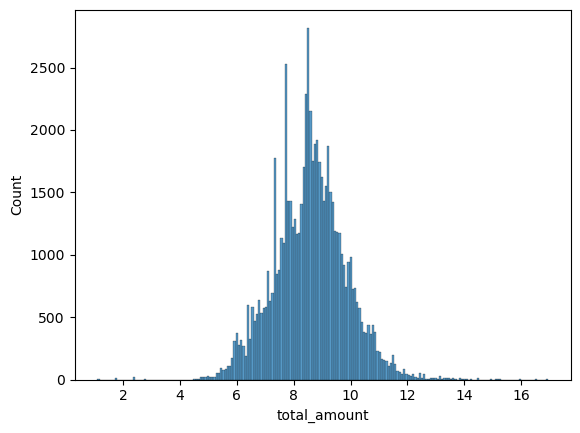

In [94]:
sns.histplot(np.log1p( df.total_amount))

### Feature Engineering
* So here we are going to concatenate both the train and test so that we can do the processing once instead of repeating for each

In [13]:
data = pd.concat([train, test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)
# we are going to one  hot encode the loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
# Convert all the columns with prefix loan_type_ to 0/1 instead of False/True
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label-encoding for the other remaining categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])


# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well

# Splitting the data back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]

test_df = data[data['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year']
----------------------------------------------------------------------------------------------------
The shape of train_df is: (68654, 45)
The shape of test_df is: (18594, 45)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_df[features_for_modelling], train['target'], stratify=train['target'], shuffle=True, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(51490, 40) (17164, 40) (51490,) (17164,)


## Initialisation & Model Training

F1 Score: 0.2615
ROC AUC Score: 0.9285

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     16849
           1       0.16      0.80      0.26       315

    accuracy                           0.92     17164
   macro avg       0.58      0.86      0.61     17164
weighted avg       0.98      0.92      0.94     17164



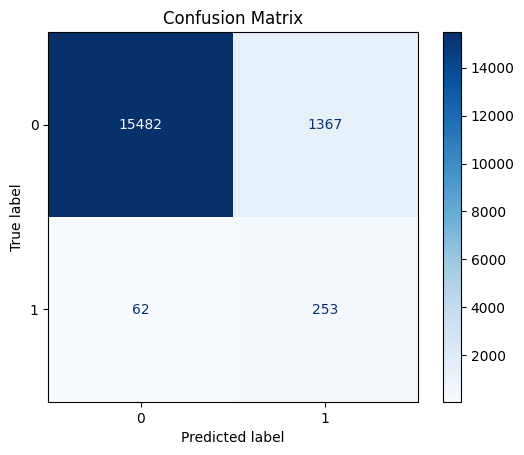

In [15]:

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_valid_scaled)
y_pred_proba = clf.predict_proba(X_valid_scaled)[:, 1]

# Evaluation Metrics
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Confusion Matrix
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(
    y_valid,
    y_pred,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


### FEATURE IMPORTANCE

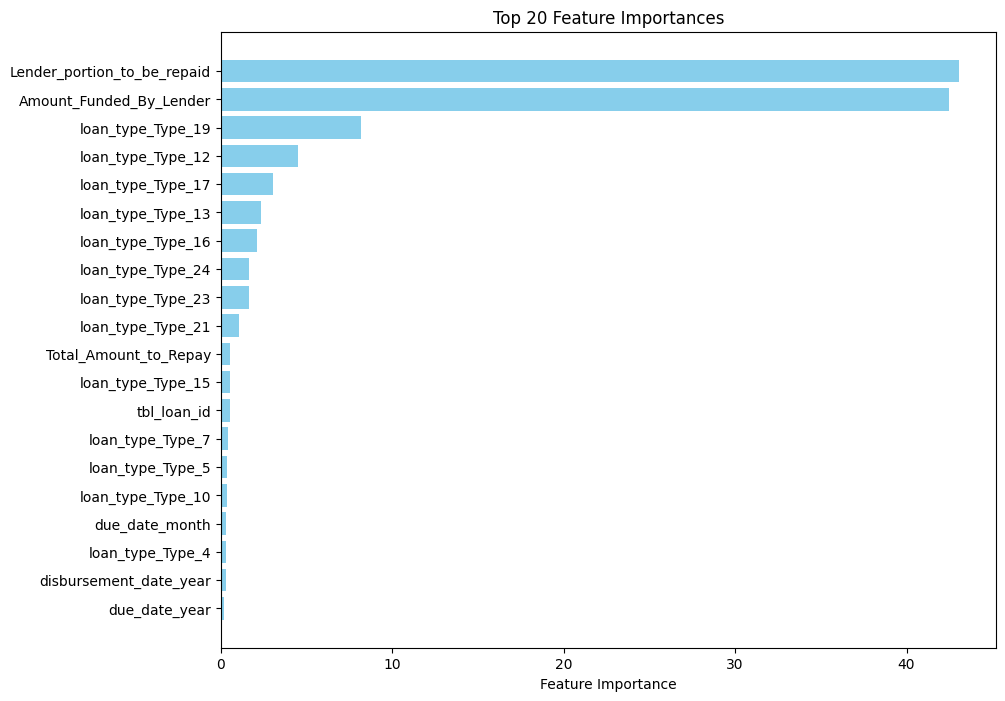

In [16]:
# Feature Importance

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

## Model Prediction & Inference

In [17]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features_for_modelling])
test_predictions_proba = clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Save the predictions to a CSV file

test_df['target'] = test_predictions
sub =  test_df[['ID', 'target']]
sub.head()


,ID,target
68654,ID_269404226088267278,0
68655,ID_255356300042267278,0
68656,ID_257026243764267278,0
68657,ID_264617299409267278,0
68658,ID_247613296713267278,0


In [18]:
sub.to_csv('baseline_submission.csv', index=False)

#### To Do
* Handle imbalance
* Do more feature engineering
* Use more sophisticated machine learning algorithms
##### Good luck

train['target].value_counts()